# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [17]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [19]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =  city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | morondava
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | hanceville
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | tidjikja
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | nuuk
Processing Record 15 of Set 1 | aasiaat
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | la passe
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | waitangi


KeyboardInterrupt: 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,longyearbyen,78.2186,15.6401,11.91,87,75,1.03,SJ,1723100286
1,porto novo,6.4965,2.6036,24.90,83,100,3.48,BJ,1723100055
2,maisi,43.0395,41.2621,23.57,51,0,2.54,GE,1723100288
3,puerto ayora,-0.7393,-90.3518,19.19,92,87,2.68,EC,1723100289
4,saint-philippe,-21.3585,55.7679,25.77,69,2,3.75,RE,1723100290


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,11.91,87,75,1.03,SJ,1723100286
1,porto novo,6.4965,2.6036,24.90,83,100,3.48,BJ,1723100055
2,maisi,43.0395,41.2621,23.57,51,0,2.54,GE,1723100288
3,puerto ayora,-0.7393,-90.3518,19.19,92,87,2.68,EC,1723100289
4,saint-philippe,-21.3585,55.7679,25.77,69,2,3.75,RE,1723100290


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

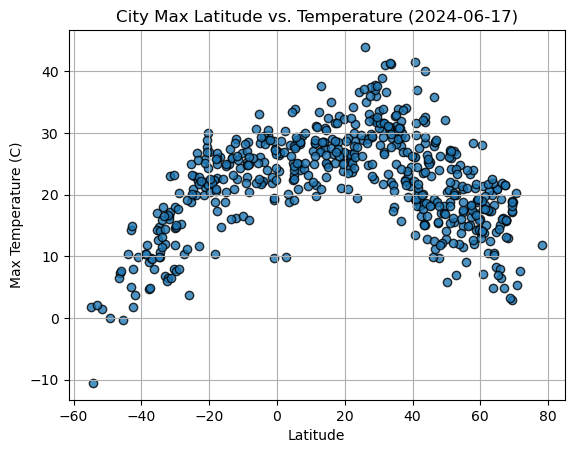

In [22]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

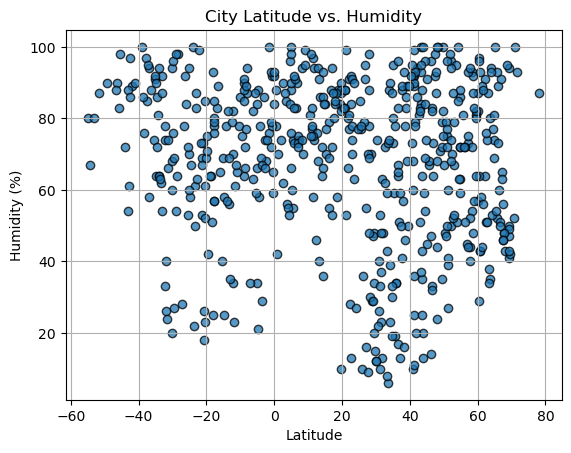

In [23]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

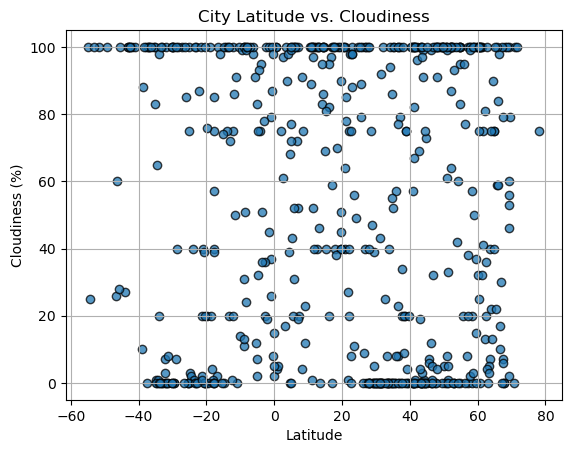

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

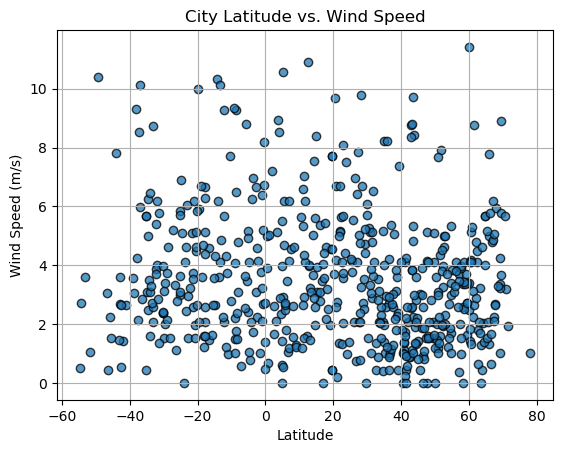

In [25]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy.stats import linregress
def plot_linear_regression(x, y, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, (min(x), min(y)), fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,longyearbyen,78.2186,15.6401,11.91,87,75,1.03,SJ,1723100286
1,porto novo,6.4965,2.6036,24.90,83,100,3.48,BJ,1723100055
2,maisi,43.0395,41.2621,23.57,51,0,2.54,GE,1723100288
7,jamestown,42.0970,-79.2353,19.45,94,100,2.06,US,1723100293
10,klyuchi,52.2667,79.1667,27.12,50,100,3.26,RU,1723100298


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto ayora,-0.7393,-90.3518,19.19,92,87,2.68,EC,1723100289
4,saint-philippe,-21.3585,55.7679,25.77,69,2,3.75,RE,1723100290
5,puerto natales,-51.7236,-72.4875,1.44,87,100,1.05,CL,1723100044
6,invercargill,-46.4000,168.3500,7.23,90,60,0.45,NZ,1723100292
8,waitangi,-43.9535,-176.5597,10.46,72,27,7.82,NZ,1723100294


###  Temperature vs. Latitude Linear Regression Plot

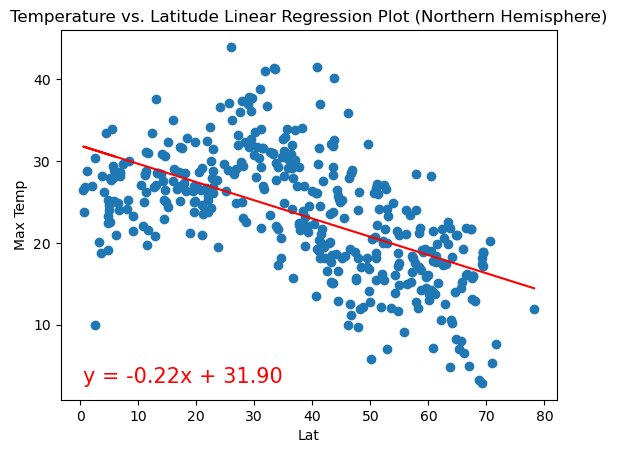

In [61]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Lat',
    'Max Temp',
    'Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)

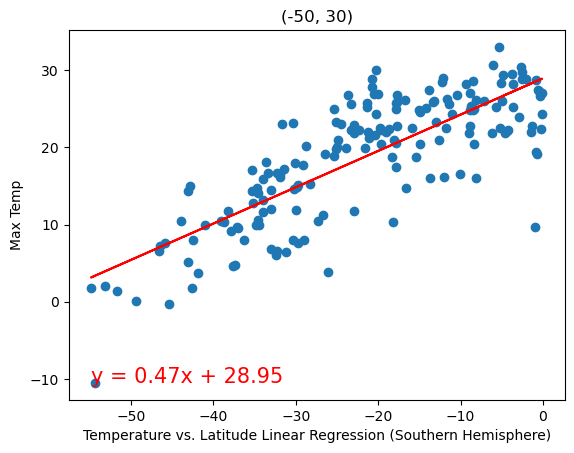

In [62]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
    "Temperature vs. Latitude Linear Regression (Southern Hemisphere)", 
    "Max Temp", (-50, 30)
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

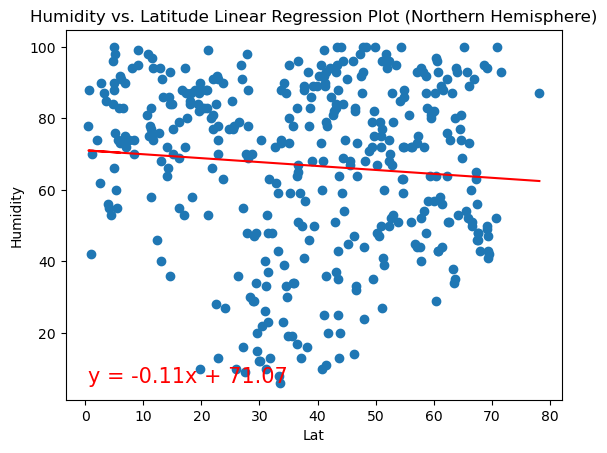

In [64]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Lat',
    'Humidity',
    'Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)


The r^2 value is: 0.014666276176618693


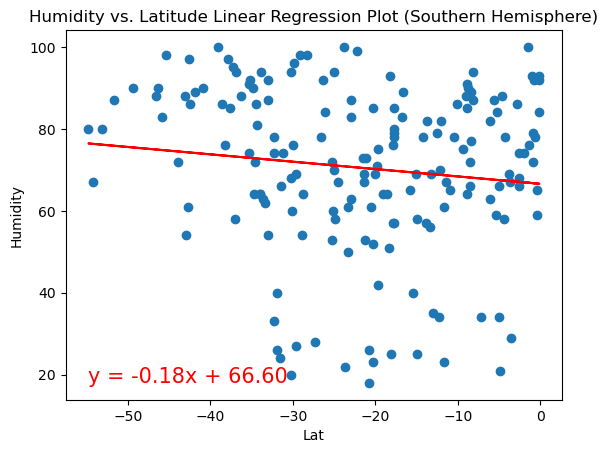

In [68]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

print(f"The r^2 value is: {r_value**2}")

plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Lat',
    'Humidity',
    'Humidity vs. Latitude Linear Regression Plot (Southern Hemisphere)'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.006899706182876772


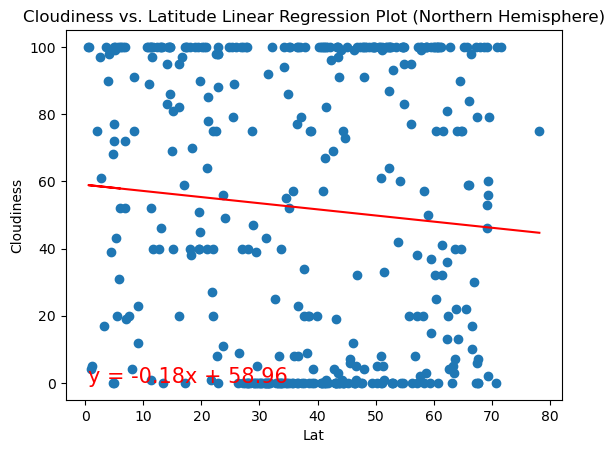

In [69]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Lat',
    'Cloudiness',
    'Cloudiness vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)

The r^2 value is: 0.002265687506661663


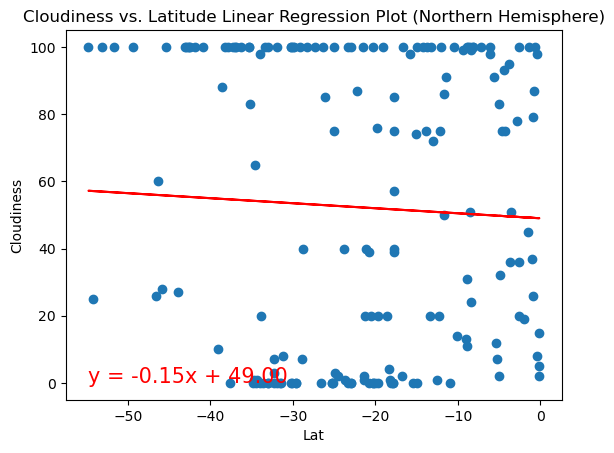

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
r_squared = r_value**2

print(f"The r^2 value is: {r_squared}")

plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Lat',
    'Cloudiness',
    'Cloudiness vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.002265687506661663


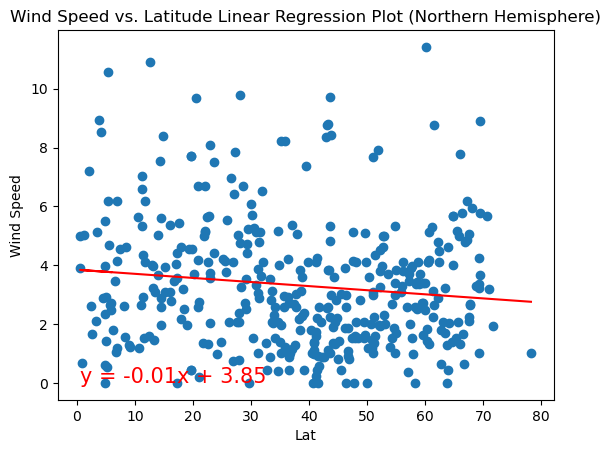

In [72]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(f"The r^2 value is: {r_squared}")

plot_linear_regression(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Lat',
    'Wind Speed',
    'Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)

The r^2 value is: 0.002265687506661663


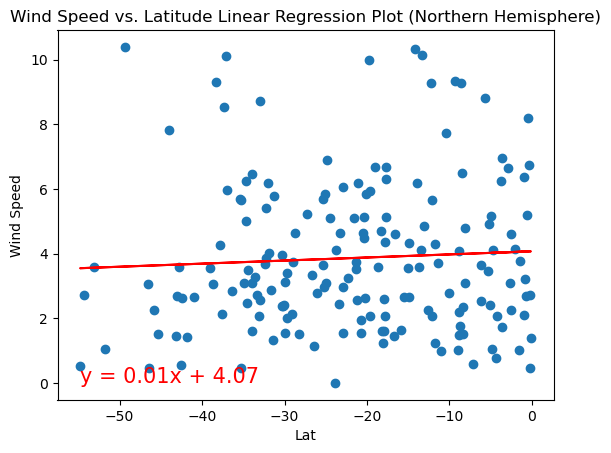

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(f"The r^2 value is: {r_squared}")

plot_linear_regression(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Lat',
    'Wind Speed',
    'Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Since r^2 values are all very close to 0. This indicates that there is virtually no linear relationship between Latitude and other factors in the dataset except temperature.